### 군집 (clustering)
#### k-평균 군집 (k-menas clustering)
* 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)을 찾는다.
* 알고리즘 단계
    1. 데이터 포인트를 가장 가까운 클러스터 중심에 할당.
    1. 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정.
    1. 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료.

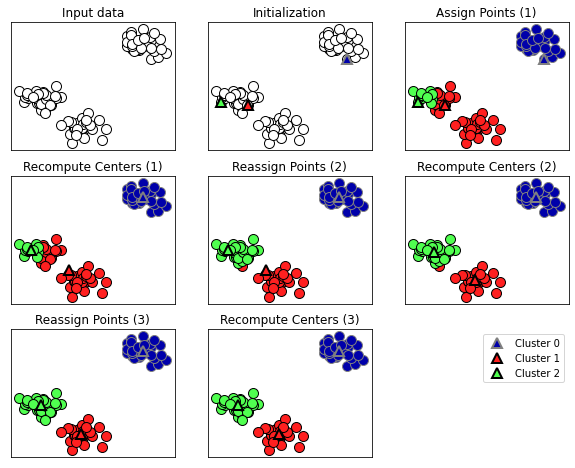

In [1]:
import mglearn

mglearn.plots.plot_kmeans_algorithm()

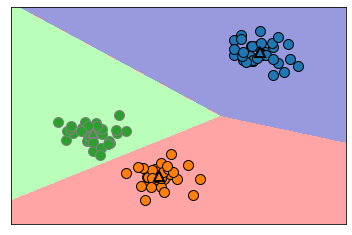

In [2]:
mglearn.plots.plot_kmeans_boundaries()

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [4]:
print('cluster label:\n{}'.format(kmeans.labels_))

cluster label:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [5]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


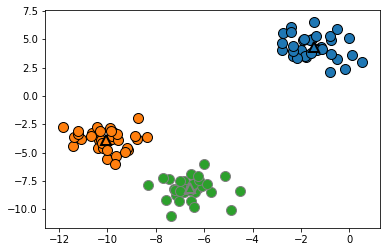

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^',
    markeredgewidth=2
)

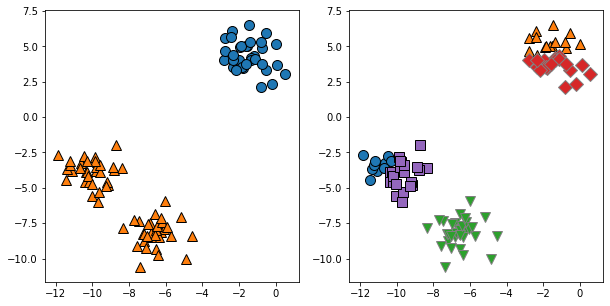

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

* k-평균 알고리즘이 실패하는 경우
    * 데이터셋의 클러스터 개수를 정확하게 알고 있더라도 k-편균 알고리즘이 항상 이를 구분해낼 수 있는 것은 아니다.

Text(0, 0.5, 'feature 1')

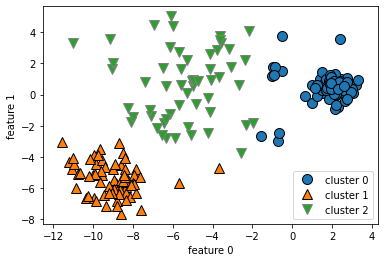

In [8]:
X_varied, y_varied = make_blobs(
    n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170
)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

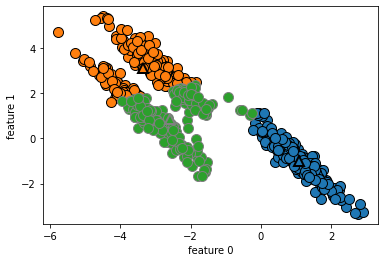

In [9]:
import numpy as np

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2
)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

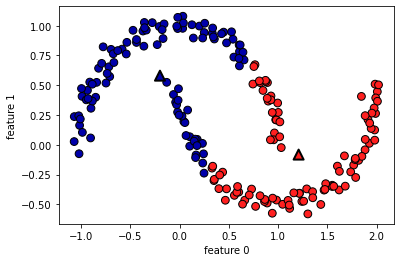

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='^',
    c=[mglearn.cm2(0), mglearn.cm2(1)],
    s=100,
    linewidth=2,
    edgecolors='k'
)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

* 벡터 양자화 또는 분해 메서드로서의 k-평균
    * PCA는 데이터에서 분산이 가장 큰 방향을 찾으려 하고,
    * NMF는 데이터의 극단 또는 일부분에 상응되는 중첩할 수 있는 성분을 찾는다.
    * 두 방법 모두 데이터 포인트를 어떤 성분의 합으로 표현.
    * k-평균은 클러스터 중심으로 각 데이터 포인트를 표현.
    * 이를 각 데이터 포인트가 클러스터 중심, 즉 하나의 성분으로 표현된다고 볼 수 있다.
    * k-평균을 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 벡터 양자화 (vector quantization)

In [11]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [12]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42
)

nmf = NMF(n_components=100, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

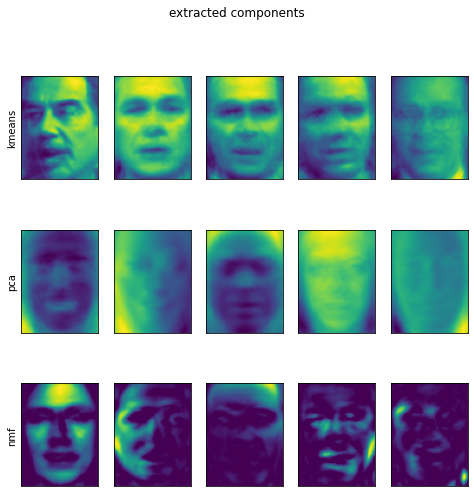

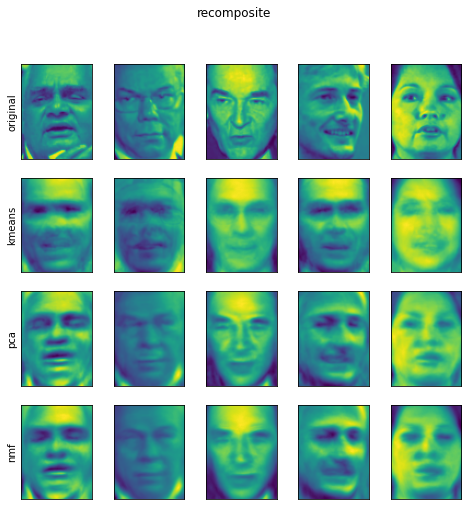

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('extracted components')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel('kmeans')
axes[1, 0].set_ylabel('pca')
axes[2, 0].set_ylabel('nmf')

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle('recomposite')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel('original')
axes[1, 0].set_ylabel('kmeans')
axes[2, 0].set_ylabel('pca')
axes[3, 0].set_ylabel('nmf')

cluster label:
[4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


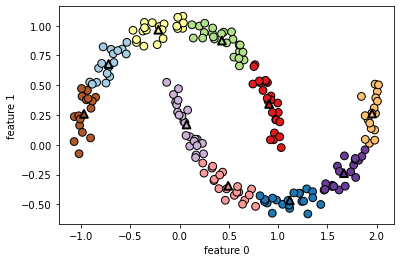

In [16]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
print('cluster label:\n{}'.format(y_pred))

In [17]:
distance_features = kmeans.transform(X)
print('cluster distance data shape:', distance_features.shape)
print('cluster distance:\n{}'.format(distance_features))

cluster distance data shape: (200, 10)
cluster distance:
[[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


* k-평균은 클러스터의 모양을 가정하고 있어서 활용 범위가 비교적 제한적.
* 찾으려 하는 클러스터의 개수를 지정해야만 한다는 것.

* k-평균 알고리즘에서 클러스터 개수를 선택하는 좋은 방법 - 엘보우 방법 (elbow method)
* 클러스터 개수를 늘려가면서 k-평균의 이너셔(inertia) 감소가 완만해지는 지점을 찾는다.
* 이너셔는 클러스터 중심에서 클러스터에 속한 각 샘플간의 제곱 거리의 합.

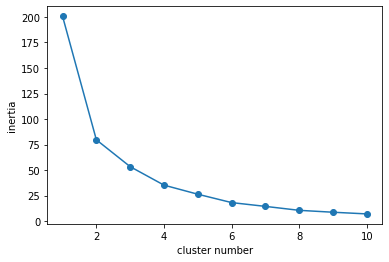

In [18]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('cluster number')
plt.ylabel('inertia')
plt.show()